<a href="https://colab.research.google.com/github/Yubelki20/Introducci-n/blob/master/cifar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [54]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

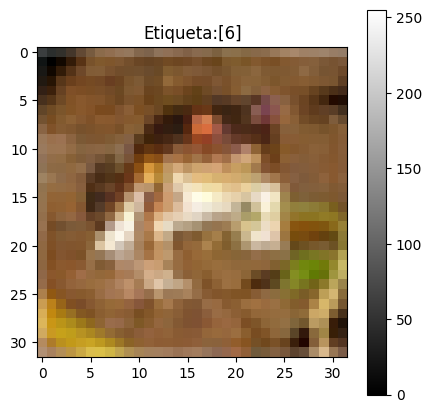

In [55]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Etiqueta:{y_train[0]}")
plt.colorbar()
plt.show()

In [56]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

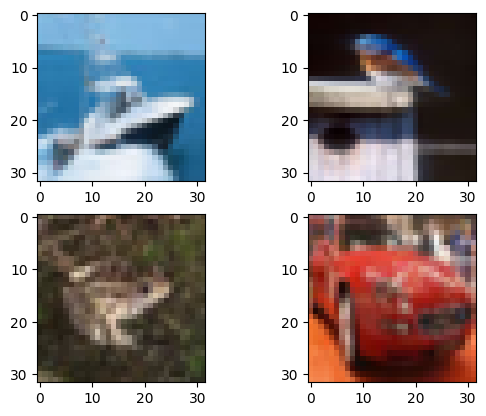

In [57]:
plt.subplot(221)
plt.imshow(X_train[8], cmap =plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[13], cmap =plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[22], cmap =plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[5], cmap =plt.get_cmap('gray'))
plt.show()

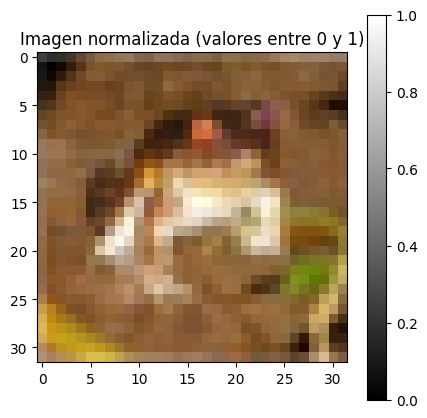

In [58]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
plt.title("Imagen normalizada (valores entre 0 y 1)")
plt.colorbar()
plt.show()


In [68]:
from threading import activeCount
# model = Sequential()
# model.add(Flatten (input_shape=(3072)))
# model.add(Dense(128,activation = 'relu'))
# model.add(Dense(64,activation = 'relu'))
# model.add(Dense(10,activation = 'softmax'))

X_train_flat = X_train.reshape(-1, 32*32*3)
X_test_flat = X_test.reshape(-1, 32*32*3)

'''model = Sequential([
    Dense(128, input_shape=(32*32*3,), activation='relu'),  # Ajustar la entrada aplanada de 3072 dimensiones
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])'''

model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

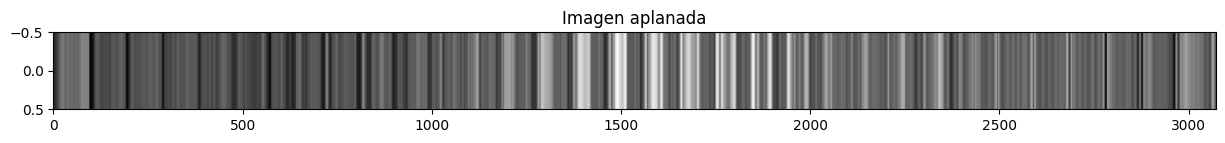

'flattened_image = X_train[0].reshape(32*32*3)  # La imagen original tiene 32x32 píxeles en color (RGB)\nplt.figure(figsize=(5,5))  # Ajustar el tamaño de la figura para mostrar la imagen correctamente\nplt.imshow(flattened_image.reshape(32, 32, 3), cmap=\'gray\')  # Reshape de nuevo para mostrar la imagen en color\nplt.title("Imagen aplanada")\nplt.axis(\'off\')  # Ocultar los ejes\nplt.show()'

In [69]:
# Aplanar la imagen y mostrarla

flattened_image = X_train[0].reshape(32*32*3)
plt.figure(figsize=(15,1))
plt.imshow(flattened_image[np.newaxis, :], aspect='auto', cmap='gray')
plt.title("Imagen aplanada")
plt.show()


'''flattened_image = X_train[0].reshape(32*32*3)  # La imagen original tiene 32x32 píxeles en color (RGB)
plt.figure(figsize=(5,5))  # Ajustar el tamaño de la figura para mostrar la imagen correctamente
plt.imshow(flattened_image.reshape(32, 32, 3), cmap='gray')  # Reshape de nuevo para mostrar la imagen en color
plt.title("Imagen aplanada")
plt.axis('off')  # Ocultar los ejes
plt.show()'''

In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
# Assume X_train is your training data with shape (200, 32, 32, 3)
#model.fit(X_train, y_train, epochs=10)
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,verbose=2)

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_10' (type Sequential).
    
    Input 0 of layer "conv2d_8" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (200, 32, 32, 3)
    
    Call arguments received by layer 'sequential_10' (type Sequential):
      • inputs=tf.Tensor(shape=(200, 32, 32, 3), dtype=float32)
      • training=True
      • mask=None


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis =1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

print("Matriz de Confusion:")
print(conf_matrix)